# zipcode_dummies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [4]:
data=pd.read_csv(r"C:\Users\Akshaya\Desktop\python-great lakes\CAPSTONE\jupyter files\final_data_used.csv")

In [1]:
data.head()

NameError: name 'data' is not defined

In [6]:
data.columns

Index(['Unnamed: 0', 'host_id', 'host_is_superhost', 'host_identity_verified',
       'zipcode', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'No_of_amenities'],
      dtype='object')

In [7]:
data.drop(['Unnamed: 0', 'host_id','latitude', 'longitude','amenities'],axis=1,inplace=True)

In [8]:
data.head()

,host_is_superhost,host_identity_verified,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,No_of_amenities
0,0,1,13355,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,...,82.0,9.0,8.0,9.0,9.0,9.0,8.0,0,moderate,13
1,0,1,10405,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,...,93.0,9.0,9.0,9.0,9.0,10.0,9.0,0,strict_14_with_grace_period,19
2,0,0,10777,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,...,89.0,9.0,9.0,9.0,10.0,9.0,9.0,0,strict_14_with_grace_period,24
3,0,1,10243,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,26
4,1,1,10437,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,15


In [8]:
data.columns

Index(['host_is_superhost', 'host_identity_verified', 'zipcode',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'cleaning_fee', 'guests_included',
       'extra_people', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'No_of_amenities'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24558 entries, 0 to 24557
Data columns (total 24 columns):
host_is_superhost              24558 non-null int64
host_identity_verified         24558 non-null int64
zipcode                        24020 non-null object
property_type                  24558 non-null object
room_type                      24558 non-null object
accommodates                   24558 non-null int64
bathrooms                      24558 non-null float64
bedrooms                       24558 non-null float64
beds                           24558 non-null float64
bed_type                       24558 non-null object
price                          24558 non-null float64
cleaning_fee                   24558 non-null float64
guests_included                24558 non-null int64
extra_people                   24558 non-null float64
review_scores_rating           24558 non-null float64
review_scores_accuracy         24558 non-null float64
review_scores_cleanliness      24558 no

In [10]:
data['zipcode'][data['zipcode'].isnull()]='00000'
data['zipcode'].isnull().sum()

C:\Users\pavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0

In [11]:
data['zipcode']=list(map(lambda x: x[:5],data['zipcode']))

In [14]:
data1=pd.get_dummies(data,columns=['zipcode','property_type', 'room_type','bed_type','cancellation_policy'],drop_first=True)

In [15]:
y=data1['price']
X=data1.drop('price',axis=1)

In [14]:
import statsmodels.api as sm
xc=sm.add_constant(X)
lin_reg=sm.OLS(y,xc)
result=lin_reg.fit()
print(result.summary())

C:\Users\pavi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     36.98
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:59:42   Log-Likelihood:            -1.6239e+05
No. Observations:               24558   AIC:                         3.253e+05
Df Residuals:                   24292   BIC:                         3.275e+05
Df Model:                         265                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

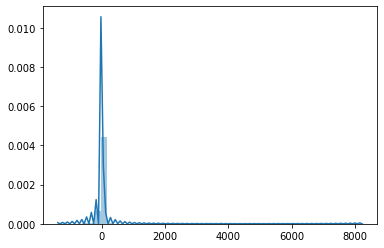

In [15]:
residuals=result.resid
sns.distplot(residuals)
plt.show()

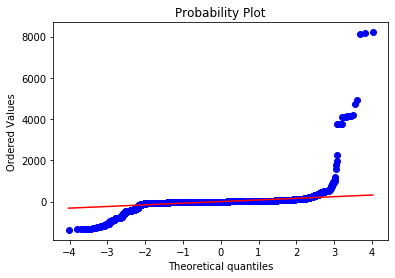

In [16]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
host_is_superhost,1.459168
host_identity_verified,1.633200
accommodates,13.977433
bathrooms,10.242848
bedrooms,7.894108
beds,8.309280
cleaning_fee,3.405736
guests_included,5.375987
extra_people,1.849039
review_scores_rating,378.717823


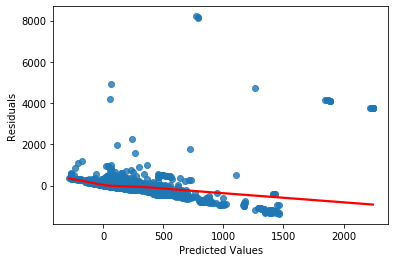

In [18]:
residuals=result.resid
y_pred=result.predict(xc)
sns.regplot(x=y_pred,y=residuals,line_kws={'color':'r'},lowess=True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Ridge

In [19]:
n_alphas=1000
alphas=np.logspace(-10,10)
ridge_cv=RidgeCV(alphas=alphas,store_cv_values=True)
ridge_cv.fit(X,y)

ridge_cv.alpha_

4.094915062380419

In [20]:
ridge=Ridge(alpha=4.094915062380419)
ridge.fit(X,y)
ridge.coef_
pd.DataFrame(ridge.coef_,X.columns,columns=['coefs'])

,coefs
host_is_superhost,-9.060203
host_identity_verified,0.686707
accommodates,10.974128
bathrooms,12.981676
bedrooms,15.727989
beds,-7.323119
cleaning_fee,0.052085
guests_included,12.276568
extra_people,0.061229
review_scores_rating,-0.246887


## Lasso

In [21]:
n_alphas=1000
alphas=np.linspace(0.001,15,n_alphas)
lasso_cv=LassoCV(alphas=alphas,cv=3, random_state=22)
lasso_cv.fit(X,y)

C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215486.66838157177, tolerance: 104226.41584526631
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262050.64101868868, tolerance: 37990.37856721232
  tol, rng, random, positive)


LassoCV(alphas=array([1.00000000e-03, 1.60140140e-02, 3.10280280e-02, 4.60420420e-02,
       6.10560561e-02, 7.60700701e-02, 9.10840841e-02, 1.06098098e-01,
       1.21112112e-01, 1.36126126e-01, 1.51140140e-01, 1.66154154e-01,
       1.81168168e-01, 1.96182182e-01, 2.11196196e-01, 2.26210210e-01,
       2.41224224e-01, 2.56238238e-01, 2.71252252e-01, 2.86266266e-01,
       3.01280280e-01, 3.16294294e-0...
       1.48348458e+01, 1.48498599e+01, 1.48648739e+01, 1.48798879e+01,
       1.48949019e+01, 1.49099159e+01, 1.49249299e+01, 1.49399439e+01,
       1.49549580e+01, 1.49699720e+01, 1.49849860e+01, 1.50000000e+01]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=22, selection='cyclic', tol=0.0001,
        verbose=False)

In [22]:
lasso_cv.alpha_

6.54711011011011

In [23]:
lasso=Lasso(alpha=6.54711011011011)
lasso.fit(X,y)
lasso.coef_
pd.DataFrame(lasso.coef_,X.columns,columns=['coefs'])

,coefs
host_is_superhost,-0.000000
host_identity_verified,-0.000000
accommodates,11.347949
bathrooms,0.000000
bedrooms,0.000000
beds,0.000000
cleaning_fee,0.091746
guests_included,5.374292
extra_people,-0.003771
review_scores_rating,-0.000000


## ElasticNet

In [24]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
n_alphas=1000
alphas=np.logspace(-6,6,n_alphas)
elastic_cv=ElasticNetCV(alphas=alphas,cv=3)
elastic_cv.fit(X,y)
elastic_cv.alpha_

C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104792.02373683453, tolerance: 104226.41584526631
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115540.40382504463, tolerance: 104226.41584526631
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127066.62261092663, tolerance: 104226.41584526631
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might 

C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 798366.2548320293, tolerance: 104226.41584526631
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 833385.899523735, tolerance: 104226.41584526631
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868916.7596076727, tolerance: 104226.41584526631
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1969290.327094555, tolerance: 104226.41584526631
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2005149.2051359415, tolerance: 104226.41584526631
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2040640.9861365557, tolerance: 104226.41584526631
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might w

C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2832783.5578318834, tolerance: 104226.41584526631
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42338.76026421785, tolerance: 37990.37856721232
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47307.08202672005, tolerance: 37990.37856721232
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402992.4689742327, tolerance: 37990.37856721232
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423614.89900028706, tolerance: 37990.37856721232
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444678.0141785741, tolerance: 37990.37856721232
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1171736.7795787454, tolerance: 37990.37856721232
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1195703.1474006772, tolerance: 37990.37856721232
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1219473.798741579, tolerance: 37990.37856721232
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1776307.2488521934, tolerance: 37990.37856721232
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1791859.6649072766, tolerance: 37990.37856721232
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1807114.8737046719, tolerance: 37990.37856721232
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56526136.383534074, tolerance: 81394.95017602613
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57595218.98420375, tolerance: 81394.95017602613
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58582363.5844055, tolerance: 81394.95017602613
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70647606.69077066, tolerance: 81394.95017602613
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70764704.87268287, tolerance: 81394.95017602613
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70875730.73982814, tolerance: 81394.95017602613
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72604557.96526618, tolerance: 81394.95017602613
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72629823.36757591, tolerance: 81394.95017602613
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72654083.68502876, tolerance: 81394.95017602613
  tol, rng, random, positive)
C:\Users\pavi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

0.055557762223988776

In [25]:
enet=ElasticNet(alpha=0.055557762223988776)
enet.fit(X,y)
pd.DataFrame(enet.coef_,X.columns,columns=['coefs'])

,coefs
host_is_superhost,-4.717944
host_identity_verified,-4.597004
accommodates,8.823165
bathrooms,8.379869
bedrooms,18.214282
beds,-8.547981
cleaning_fee,-0.103566
guests_included,13.161599
extra_people,-0.098653
review_scores_rating,-0.196171


In [26]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
enet=ElasticNet(alpha=0.055557762223988776)
lasso=Lasso(alpha=6.54711011011011)
ridge=Ridge(alpha=4.094915062380419)
models=[]

In [27]:
models.append(('Linear',LR))
models.append(('Ridge',ridge))
models.append(('Lasso',lasso))
models.append(('ElasticNet',enet))

In [28]:
from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Linear: -34741727656381784.000000 (10260013126243141656641402788904960.000000))
Ridge: 0.232816 (0.014582))
Lasso: 0.079792 (0.001362))
ElasticNet: 0.147510 (0.001679))


In [29]:
from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Linear: -1185696046141985259520.000000 (11057694830888813339638532069784441097027584.000000))
Ridge: -33677.432952 (287855079.583481))
Lasso: -42670.376467 (695995647.071692))
ElasticNet: -39367.096678 (561777130.130092))


In [25]:
from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Linear: -195026482.592219 (84580669371661120.000000))
Ridge: -41.488368 (6.026568))
Lasso: -35.070010 (12.858413))
ElasticNet: -37.288728 (8.897145))


## DT

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


dt=DecisionTreeRegressor(random_state=0)
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(dt,param,cv=3,scoring='r2')
GS.fit(X,y)
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

-0.009691049503474363
{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeRegressor(criterion='mse', max_depth=7, max_features='sqrt',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


dt=DecisionTreeRegressor(random_state=0)
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(dt,param,cv=3,scoring='neg_mean_squared_error')
GS.fit(X,y)
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

-40061.579397386224
{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='sqrt',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


dt=DecisionTreeRegressor(random_state=0)
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(dt,param,cv=3,scoring='neg_mean_absolute_error')
GS.fit(X,y)
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

-35.93335214063816
{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeRegressor(criterion='mse', max_depth=8, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


## RF

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(rf,param,cv=3,scoring='r2')
GS.fit(X,y)
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

0.08441654234336357
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [34]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(rf,param,cv=3,scoring='neg_mean_squared_error')
GS.fit(X,y)
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

-42635.48257718466
{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


## Bagging

In [36]:
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings("ignore")

alg=['DT','LR']
for i in alg:
    if i=='DT':
        results=[]
        cart = DecisionTreeRegressor(random_state=0,max_depth= 7, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    else:
        results=[]
        cart =LinearRegression()
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()

DT: 0.562181 (0.015886))

LR: -4815605308105118.000000 (129495556350762985069857069858816.000000))



In [37]:
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings("ignore")

alg=['DT','LR']
for i in alg:
    if i=='DT':
        results=[]
        cart = DecisionTreeRegressor(random_state=0,max_depth=6, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5)
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    else:
        results=[]
        cart =LinearRegression()
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()

DT: -23736.233738 (247499110.886455))

LR: -104891700584917958656.000000 (50264416392968053116588953951411120373760.000000))



In [38]:
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings("ignore")

alg=['DT','LR']
for i in alg:
    if i=='DT':
        results=[]
        cart = DecisionTreeRegressor(random_state=0,max_depth= 8, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 10)
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_absolute_error')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    else:
        results=[]
        cart =LinearRegression()
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_absolute_error')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()

DT: -26.304634 (3.836552))

LR: -101807214.349774 (37107416073232392.000000))



## Adaboost

In [39]:
from sklearn.ensemble import AdaBoostRegressor
alg=['RF','DT','LR']
for i in alg:
    if i=='DT':
        results=[]
        cart = DecisionTreeRegressor(random_state=0,max_depth=7, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    elif i =='RF':
        results=[]
        cart = RandomForestRegressor(max_depth=5, max_features= 'sqrt', min_samples_leaf=4,min_samples_split= 5)
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    else:
        results=[]
        cart =LinearRegression()
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()

RF: -3.724195 (13.908500))

DT: 0.657228 (0.076748))

LR: -2.218189 (14.885078))



In [40]:
from sklearn.ensemble import AdaBoostRegressor
alg=['RF','DT','LR']
for i in alg:
    if i=='DT':
        results=[]
        cart = DecisionTreeRegressor(random_state=0,max_depth=7, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    elif i =='RF':
        results=[]
        cart = RandomForestRegressor(max_depth=5, max_features= 'sqrt', min_samples_leaf=4,min_samples_split= 5)
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    else:
        results=[]
        cart =LinearRegression()
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()

RF: -155539.210255 (3413619519.110729))

DT: -12783.724138 (79359926.663790))

LR: -140835.700968 (34561711709.022636))



In [40]:
from sklearn.ensemble import AdaBoostRegressor
alg=['DT','LR']
for i in alg:
    if i=='DT':
        results=[]
        cart = DecisionTreeRegressor(random_state=0,max_depth=7, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_absolute_error')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    else:
        results=[]
        cart =LinearRegression()
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_absolute_error')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()

SyntaxError: invalid syntax (<ipython-input-40-28f3671c8345>, line 24)

In [43]:
from sklearn import model_selection

results=[]
model = DecisionTreeRegressor(random_state=0,max_depth=7, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
       
kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
results.append(cv_results)
        
print(' %f (%f))' %(np.mean(cv_results),np.var(cv_results,ddof=1)))
print()

 0.400715 (0.071680))



In [45]:
from sklearn import model_selection

results=[]
model = RandomForestRegressor(max_depth=5, max_features= 'sqrt', min_samples_leaf=4,min_samples_split= 5)
       
kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
results.append(cv_results)
        
print(' %f (%f))' %(np.mean(cv_results),np.var(cv_results,ddof=1)))
print()

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

 0.380376 (0.017765))



In [46]:
model = RandomForestRegressor(max_depth=5, max_features= 'sqrt', min_samples_leaf=4,min_samples_split= 5)
       
kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
results.append(cv_results)
        
print(' %f (%f))' %(np.mean(cv_results),np.var(cv_results,ddof=1)))
print()

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

 -32351.586050 (404902822.042408))



In [44]:
from sklearn.ensemble import GradientBoostingRegressor
results=[]
model = GradientBoostingRegressor(random_state=0,max_depth= 7, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
results.append(cv_results)
print('%f (%f))' %(np.mean(cv_results),np.var(cv_results,ddof=1)))
print()

0.806164 (0.006847))



In [44]:
from sklearn.ensemble import GradientBoostingRegressor
results=[]
model = GradientBoostingRegressor(random_state=0,max_depth=7, max_features= 'sqrt', min_samples_leaf=1, min_samples_split= 2)
kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
results.append(cv_results)
print('%f (%f))' %(np.mean(cv_results),np.var(cv_results,ddof=1)))
print()

-7636.010189 (25186020.907707))



In [9]:
data2=data[data['zipcode'].notna()]

In [10]:
data2=pd.get_dummies(data,columns=['zipcode','property_type', 'room_type','bed_type','cancellation_policy'],drop_first=True)


y=data2['price']
X=data2.drop('price',axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0,max_depth=7, max_features= 'sqrt', min_samples_leaf=1, min_samples_split= 2)

model.fit(X_train, y_train)
print(); print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print()
print("Decision Tree")
print('train score', model.score(X_train,y_train))
print('test score', model.score(X_test,y_test))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Decision Tree
train score 0.9362493640397587
test score 0.7233595142124396


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0,max_depth=7, max_features= 'sqrt', min_samples_leaf=1, min_samples_split= 2)

model.fit(X_train, y_train)
print(); print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print()
print("Decision Tree")
print('train score', model.score(X_train,y_train))
print('test score', model.score(X_test,y_test))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Decision Tree
train score 0.9419467703777291
test score 0.8247681064152288


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
print(); print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print()
print("Linear Model")
print('train score', model.score(X_train,y_train))
print('test score', model.score(X_test,y_test))




from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

model=Ridge(alpha=4.094915062380419)

model.fit(X_train, y_train)
print(); print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print()
print("Ridge")
print('train score', model.score(X_train,y_train))
print('test score', model.score(X_test,y_test))







from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

model=Lasso(alpha=6.154)

model.fit(X_train, y_train)
print(); print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print()
print("Lasso")
print('train score', model.score(X_train,y_train))
print('test score', model.score(X_test,y_test))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Linear Model
train score 0.27867821903260404
test score -97750540507.31424

Ridge(alpha=4.094915062380419, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge
train score 0.2774855709523637
test score 0.2633724118940215

Lasso(alpha=6.154, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso
train score 0.05806488845300405
test score 0.031349586042996314


In [30]:
from sklearn.linear_model import ElasticNet
model=enet=ElasticNet(alpha=0.0555)

model.fit(X_train, y_train)
print(); print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print()
print("Ridge")
print('train score', model.score(X_train,y_train))
print('test score', model.score(X_test,y_test))


from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor(random_state=0,max_depth=7, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
model.fit(X_train, y_train)
print(); print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print()
print("Ridge")
print('train score', model.score(X_train,y_train))
print('test score', model.score(X_test,y_test))


ElasticNet(alpha=0.0555, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Ridge
train score 0.1461147923840015
test score 0.10519937938168511

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features='sqrt',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

Ridge
train score 0.48553919131713497
test score 0.49293261126973975


In [51]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth= 9, max_features= 'auto', min_samples_leaf= 2,min_samples_split= 10)
model.fit(X_train, y_train)
print(); print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print()
print("Rf")
print('train score', model.score(X_train,y_train))
print('test score', model.score(X_test,y_test))

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Rf
train score 0.8100762326357336
test score 0.6823831549662596


In [33]:
from sklearn.ensemble import AdaBoostRegressor


cart = DecisionTreeRegressor(random_state=0,max_depth=7, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
model = AdaBoostRegressor(base_estimator=cart, random_state=0)

model.fit(X_train, y_train)
print(); print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print()
print("dtt-ada")
print('train score', model.score(X_train,y_train))
print('test score', model.score(X_test,y_test))



cart = RandomForestRegressor(max_depth= 9, max_features= 'auto', min_samples_leaf= 2,min_samples_split= 10)
model = AdaBoostRegressor(base_estimator=cart, random_state=0)

model.fit(X_train, y_train)
print(); print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print()
print("Rf-ada")
print('train score', model.score(X_train,y_train))
print('test score', model.score(X_test,y_test))


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=7,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=0,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_s

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest


AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=9,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=2,
                                                       min_samples_split=10,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators='warn',
                                                       n_jobs=None,
                                                       oob_score=False,
                     

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

def LR(X,y):
    train=[]
    test=[]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    train.append([X_train.shape])
    test.append([y_train.shape])
    train.append([X_test.shape])
    test.append([y_test.shape])
    lr=LinearRegression(fit_intercept=True)
    lr.fit(X_train,y_train)
    y_pred_train= lr.predict(X_train)
    y_pred_test= lr.predict(X_test)
    train.append([r2_score(y_train,y_pred_train)])
    test.append([r2_score(y_test,y_pred_test)])
    rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
    rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
    train.append([rmse_train])
    test.append([rmse_test])
    train.append([(np.sqrt(mean_squared_error(y_train,y_pred_train)))*100])
    test.append([(np.sqrt(mean_squared_error(y_test,y_pred_test))*100)])
    train_pd=pd.DataFrame(train,columns=['Train'])
    test_pd=pd.DataFrame(test,columns=['Test'])
    output=pd.concat([train_pd,test_pd],axis=1)
    p=output.rename({0:'size(Xtrain,ytrain)',2:'r2',1:'size(Xtest,ytest)',3:'rmse',4:'rmse*100'},axis=0)
    return p

In [38]:
LR(X,y)

,Train,Test
"size(Xtrain,ytrain)","(17190, 270)","(17190,)"
"size(Xtest,ytest)","(7368, 270)","(7368,)"
r2,0.319111,-5.3226e+14
rmse,167.542,5.43992e+09
rmse*100,16754.2,5.43992e+11
